<a href="https://colab.research.google.com/github/RayNG123/stock-price-prediction/blob/main/00_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [13]:
stock_data = pd.read_csv('apple_stock.csv').drop(['Unnamed: 0'],axis = 1)

#Split Train/Val/Test Data

In [14]:
X_train_val, y_train_val = stock_data.iloc[:325,:-1].values, stock_data.iloc[:325,-1:].values
X_test, y_test = stock_data.iloc[325:,:-1].values, stock_data.iloc[325:,-1:].values

###Base Line

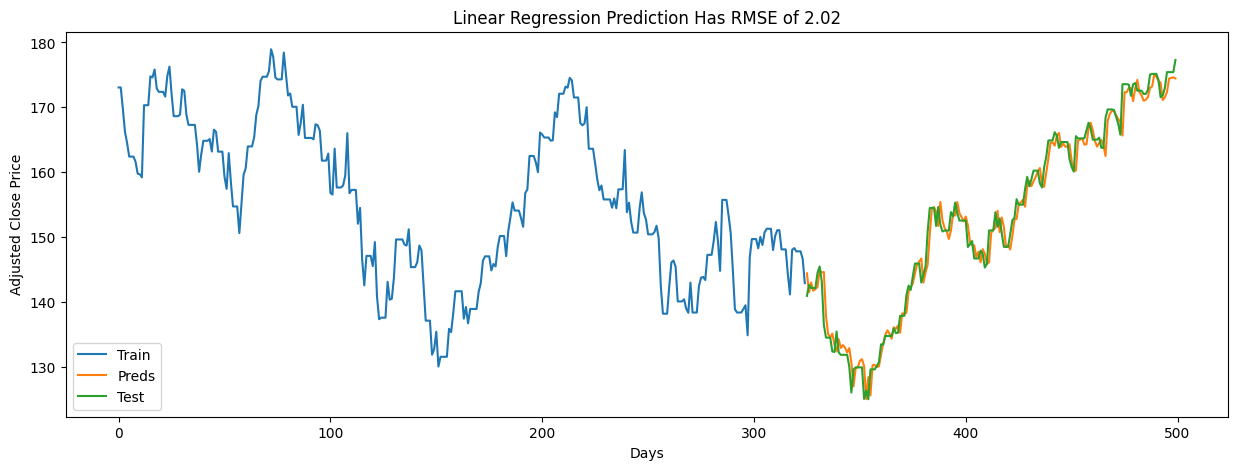

In [68]:
model = LinearRegression()
model.fit(X_train_val, y_train_val)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))

plt.figure(figsize=(15, 5))
plt.plot(range(325),y_train_val,label = "Train")
plt.plot(range(325,500),preds,label = "Preds")
plt.plot(range(325,500),y_test,label = "Test")
plt.legend()

plt.title(f'Linear Regression Prediction Has RMSE of {rmse:.2f}')
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')

plt.show()

In [85]:
model.coef_[0]

array([-1.29056119e-02,  2.45295117e-02,  1.55657251e-02, -4.31278011e-02,
       -6.61647530e-02,  1.92846376e-01, -2.26270983e-01,  1.28219641e-01,
        2.30632206e-02,  3.26726877e-02, -2.92974073e-02, -2.19509081e-02,
       -1.27547251e-01,  4.68115951e-02,  1.21657942e-01, -6.35712030e-02,
       -5.69900832e-02,  9.38277213e-02, -2.04628247e-04,  9.39277174e-01])

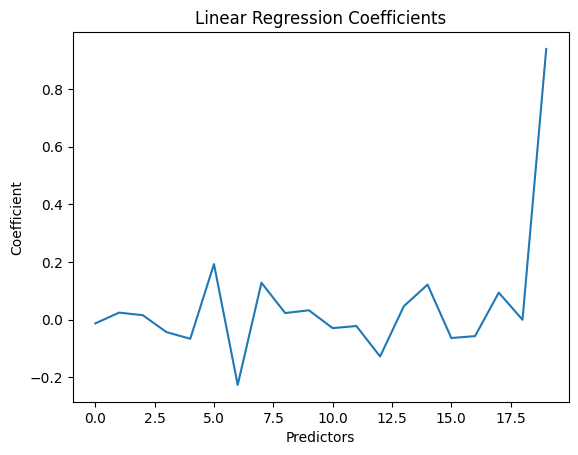

In [91]:
plt.plot(model.coef_[0])
plt.xlabel('Predictors')
plt.ylabel('Coefficient')
plt.title('Linear Regression Coefficients')
plt.show()

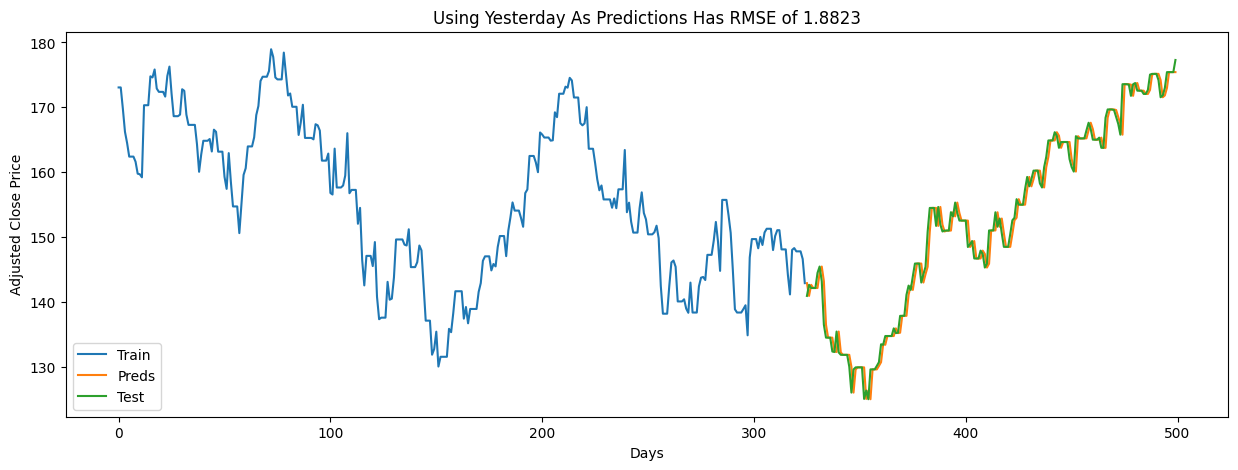

In [99]:
preds = np.concatenate([y_train_val[-1:],y_test[:-1]])
rmse = np.sqrt(mean_squared_error(y_test,preds))

plt.figure(figsize=(15, 5))
plt.plot(range(325),y_train_val,label = "Train")
plt.plot(range(325,500),preds,label = "Preds")
plt.plot(range(325,500),y_test,label = "Test")
plt.legend()

plt.title(f'Using Yesterday As Predictions Has RMSE of {rmse:.4f}')
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')
plt.show()

#Lasso Modeling

In [92]:
tscv = TimeSeriesSplit(n_splits=20)  # This means we'll use 5 folds

alphas = [0.01,0.1,1,1.5,2,2.5,3]
all_results = []
for alpha in alphas:
  # Perform cross-validation
  result = []
  for train_index, test_index in tscv.split(X_train_val):
      X_train, X_val = X_train_val[train_index], X_train_val[test_index]
      y_train, y_val = y_train_val[train_index], y_train_val[test_index]
      
      model = Lasso(alpha = alpha) # Choose the model you want to evaluate
      model.fit(X_train, y_train)
      
      pred = model.predict(X_val)
      
      # Calculate and print MSE for each split
      result.append(mean_squared_error(y_val, pred)**(1/2))
  all_results.append((np.array(result).mean(),alpha))

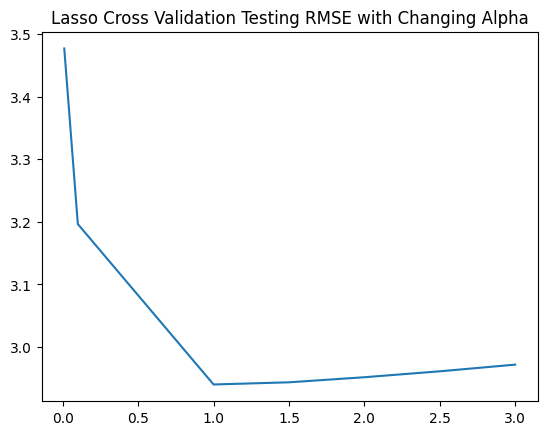

In [93]:
mse = [i[0] for i in all_results]
alpha = [i[1] for i in all_results]
plt.plot(alpha,mse)
plt.title('Lasso Cross Validation Testing RMSE with Changing Alpha')
plt.show()

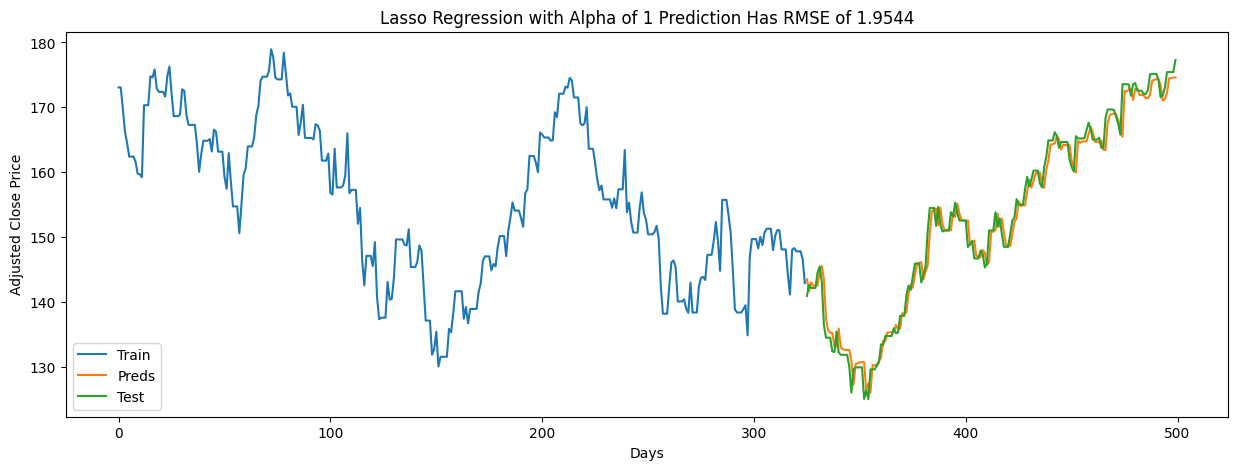

In [98]:
model = Lasso(alpha=1)
model.fit(X_train_val, y_train_val)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))

plt.figure(figsize=(15, 5))
plt.plot(range(325),y_train_val,label = "Train")
plt.plot(range(325,500),preds,label = "Preds")
plt.plot(range(325,500),y_test,label = "Test")
plt.legend()

plt.title(f'Lasso Regression with Alpha of 1 Prediction Has RMSE of {rmse:.4f}')
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')

plt.show()

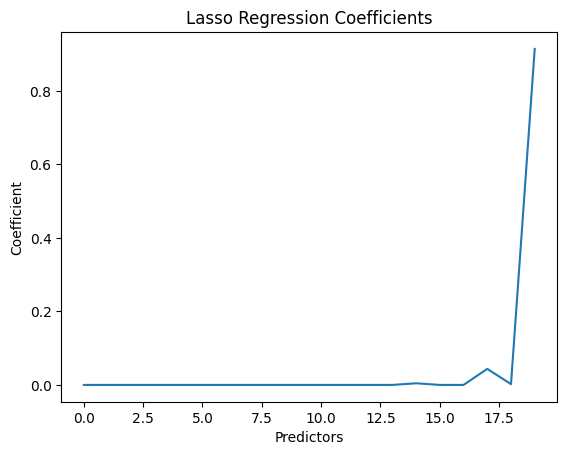

In [97]:
plt.plot(model.coef_)
plt.xlabel('Predictors')
plt.ylabel('Coefficient')
plt.title('Lasso Regression Coefficients')
plt.show()

#KNerighbors

In [65]:
tscv = TimeSeriesSplit(n_splits=20)  # This means we'll use 5 folds

n_neighbors = [3,4,5,6,7,8,9,12,15,18,21]
all_results = []
for  n_neighbor in n_neighbors:
  # Perform cross-validation
  result = []
  for train_index, test_index in tscv.split(X_train_val):
      X_train, X_val = X_train_val[train_index], X_train_val[test_index]
      y_train, y_val = y_train_val[train_index], y_train_val[test_index]
      
      model = KNeighborsRegressor(n_neighbors= n_neighbor)
      model.fit(X_train, y_train)
      
      pred = model.predict(X_val)
      
      # Calculate and print MSE for each split
      result.append(mean_squared_error(y_val, pred)**(1/2))
  all_results.append((np.array(result).mean(),n_neighbor))

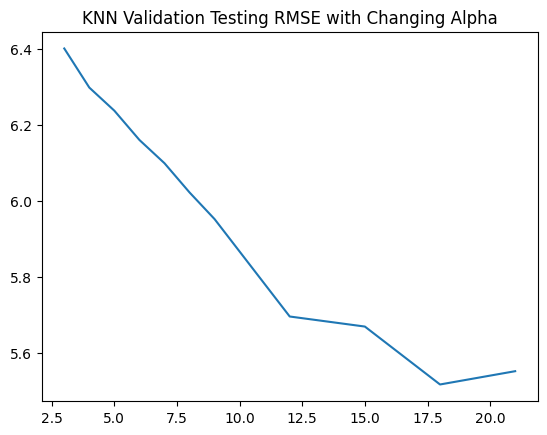

In [66]:
mse = [i[0] for i in all_results]
n_neighbors = [i[1] for i in all_results]
plt.plot(n_neighbors,mse)
plt.title('KNN Validation Testing RMSE with Changing Alpha')
plt.show()

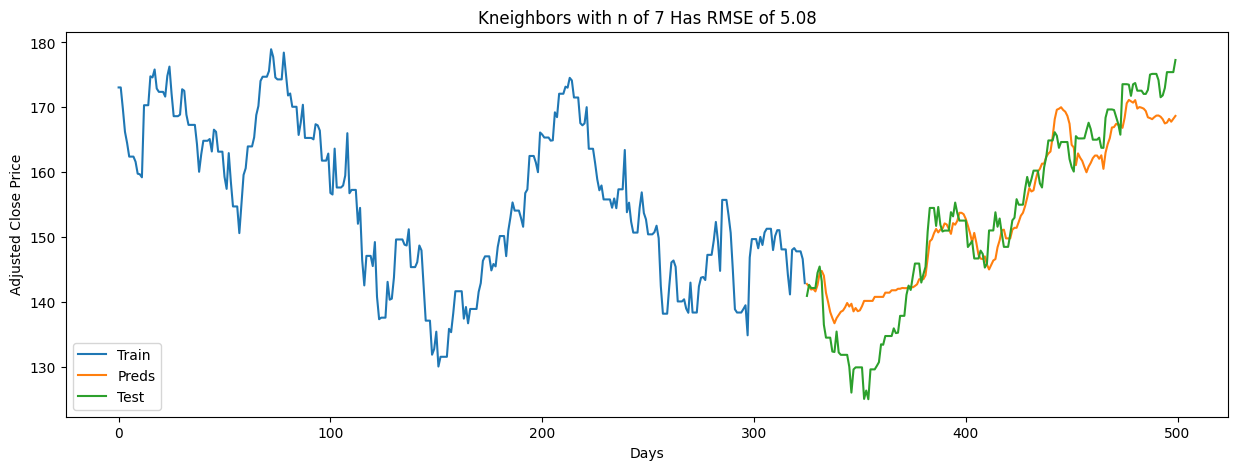

In [67]:
model = KNeighborsRegressor(n_neighbors= 18)
model.fit(X_train_val, y_train_val)
preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test,preds))

plt.figure(figsize=(15, 5))
plt.plot(range(325),y_train_val,label = "Train")
plt.plot(range(325,500),preds,label = "Preds")
plt.plot(range(325,500),y_test,label = "Test")
plt.legend()

plt.title(f'Kneighbors with n of 7 Has RMSE of {rmse:.2f}')
plt.xlabel('Days')
plt.ylabel('Adjusted Close Price')

plt.show()